In [621]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [622]:
df = pd.read_csv('data/Cars.csv') #load the dataset from the data folder into pandas data frame
df.head() #Display the first few rows of the dataset

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [623]:
df.isnull().sum() #checking for missing or null values in the dataset

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [624]:
df.columns #checking the column names in the dataset

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [625]:
#renaming the column "name" to "brand"

df.rename(columns={
    'name': 'brand'
    }, inplace=True)

In [626]:
#confirming the column name change from 'name' to 'brand'
df.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [627]:
#TASK 1.1

#Checking the unique values in the 'owner' column
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [628]:
#checking the data type if the owner column before mapping
df['owner'].dtype

dtype('O')

In [629]:
#mapping the 5 distinct values in 'owner' column to numbers 1-5
owner_map = {
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car': 5
}
df['owner'] = df['owner'].map(owner_map)

In [630]:
#checking the data type if the owner column after mapping
df['owner'].dtype

dtype('int64')

In [631]:
#confirming the mapping by checking the unique values in the owner column
df['owner'].unique() 

array([1, 2, 3, 4, 5])

In [632]:
#TASK 1.2

#checking the unique values in the 'fuel' column
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [633]:
#removing the rows with 'LPG' and 'CNG' in the 'fuel' column
df = df[~df['fuel'].isin(['LPG', 'CNG'])]

In [634]:
#checking if 'LPG' and 'CNG' have been removed from the fuel column
df['fuel'].unique()

array(['Diesel', 'Petrol'], dtype=object)

In [635]:
#TASK 1.3

#Checking few rows of the column 'mileage' to see the format of data
df['mileage'].head()

0     23.4 kmpl
1    21.14 kmpl
2     17.7 kmpl
3     23.0 kmpl
4     16.1 kmpl
Name: mileage, dtype: object

In [636]:
#splitting the mileage column data after space to separate the numeric part from 'kmpl'
#Then keeping only the first index of the split which is the numeric value
df['mileage'] = df['mileage'].str.split(' ').str[0]

In [637]:
#checking the datatype of the mileage column
df['mileage'].dtype

dtype('O')

In [638]:
#after removing the 'kmpl' part, we are converting the numeric value to float datatype
df['mileage'] = df['mileage'].astype(float)

In [639]:
#checking the data type of mileage column after the conversion
df['mileage'].dtype

dtype('float64')

In [640]:
#confirming the datatype conversion by checking few rows of the mileage column
df['mileage'].head()

0    23.40
1    21.14
2    17.70
3    23.00
4    16.10
Name: mileage, dtype: float64

In [641]:
#TASK 1.4

#Checking few rows of the column 'engine' to see the format of data
df['engine'].head

<bound method NDFrame.head of 0       1248 CC
1       1498 CC
2       1497 CC
3       1396 CC
4       1298 CC
         ...   
8123    1197 CC
8124    1493 CC
8125    1248 CC
8126    1396 CC
8127    1396 CC
Name: engine, Length: 8033, dtype: object>

In [642]:
#checking the datatype of the engine column before converting to float
df['engine'].dtype

dtype('O')

In [643]:
#splitting the engine column data after space to separate the numeric part from 'cc'
#Then keeping only the first index of the split which is the numeric value
df['engine'] = df['engine'].str.split(' ').str[0]

In [644]:
#converting the engine column to float datatype
df['engine'] = df['engine'].astype(float)

#checking the data type of engine column after the conversion
df['engine'].dtype

dtype('float64')

In [645]:
#confirming the datatype conversion by checking few rows of the engine column
df['engine'].head()

0    1248.0
1    1498.0
2    1497.0
3    1396.0
4    1298.0
Name: engine, dtype: float64

In [646]:
#TASK 1.5

#Checking few rows of the column 'max_power' to see the format of data
df['max_power'].head()

0        74 bhp
1    103.52 bhp
2        78 bhp
3        90 bhp
4      88.2 bhp
Name: max_power, dtype: object

In [647]:
#checking the datatype of the max_power column before conversion
df['max_power'].dtype

dtype('O')

In [648]:
#splitting the max_power column data after space to separate the numeric part from 'bhp'
df['max_power'] = df['max_power'].str.split(' ').str[0]
#converting the max_power column to float datatype
df['max_power'] = df['max_power'].astype(float)

In [649]:
#checking the data type of max_power column after the conversion
df['max_power'].dtype

dtype('float64')

In [650]:
#checking few rows to confirm the changes after conversion
df['max_power'].head()

0     74.00
1    103.52
2     78.00
3     90.00
4     88.20
Name: max_power, dtype: float64

In [651]:
#TASK 1.6

#splitting the brand column data after space to separate the brand name from additional details
df['brand'] = df['brand'].str.split(' ').str[0]

In [652]:
#checking few rows of the brand column to confirm the changes
df['brand'].head()

0     Maruti
1      Skoda
2      Honda
3    Hyundai
4     Maruti
Name: brand, dtype: object

In [653]:
#TASK 1.7

#Dropping the 'torque' column
df = df.drop(columns=['torque'])

In [654]:
#confirming the deletion of the 'torque' column by checking the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8033 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          8033 non-null   object 
 1   year           8033 non-null   int64  
 2   selling_price  8033 non-null   int64  
 3   km_driven      8033 non-null   int64  
 4   fuel           8033 non-null   object 
 5   seller_type    8033 non-null   object 
 6   transmission   8033 non-null   object 
 7   owner          8033 non-null   int64  
 8   mileage        7819 non-null   float64
 9   engine         7819 non-null   float64
 10  max_power      7825 non-null   float64
 11  seats          7819 non-null   float64
dtypes: float64(4), int64(4), object(4)
memory usage: 815.9+ KB


In [655]:
#TASK 1.8

#Removing data where owner value is NOT 5(test drive car)
df = df[df['owner'] != 5]


In [656]:
#checking the unique values in owner column to confirm the removal of Test Drive Car
df['owner'].unique()

array([1, 2, 3, 4])

In [657]:
#TASK 1.9

#log transformation of the selling price
y = np.log(df['selling_price'])

In [658]:
#FINAL DATA

#confirming all the changes made
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


TASK 3

Univariate Analysis

Countplot (For all the features that are discrete)

<Axes: xlabel='fuel', ylabel='count'>

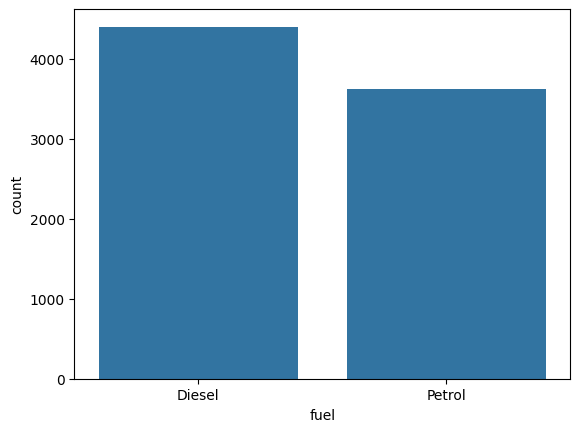

In [659]:
#counting the number of cars for different fuel types
sns.countplot(data = df, x = 'fuel')

<Axes: xlabel='seller_type', ylabel='count'>

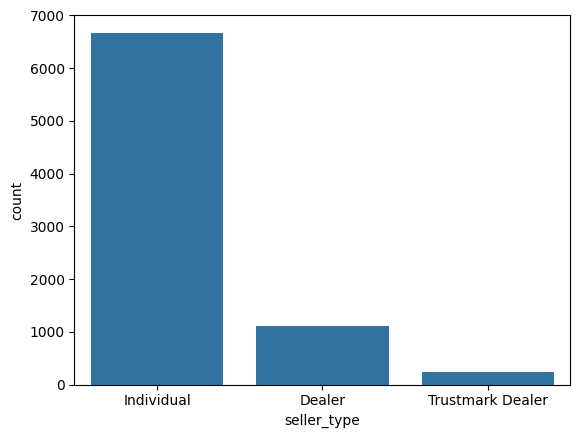

In [660]:
#counting the number of cars for different seller types
sns.countplot(data = df, x = 'seller_type')

<Axes: xlabel='owner', ylabel='count'>

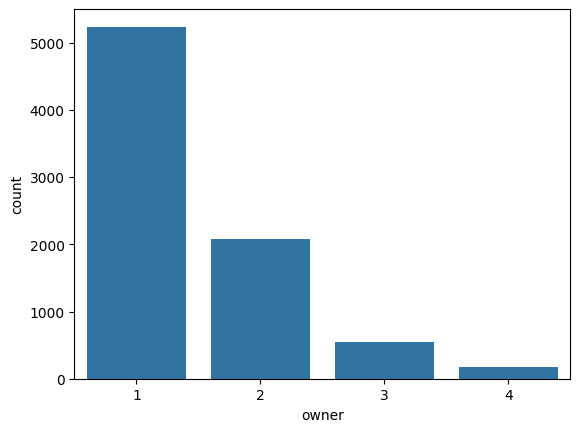

In [661]:
#counting the number of cars based on owner
sns.countplot(data = df, x = 'owner')

<Axes: xlabel='transmission', ylabel='count'>

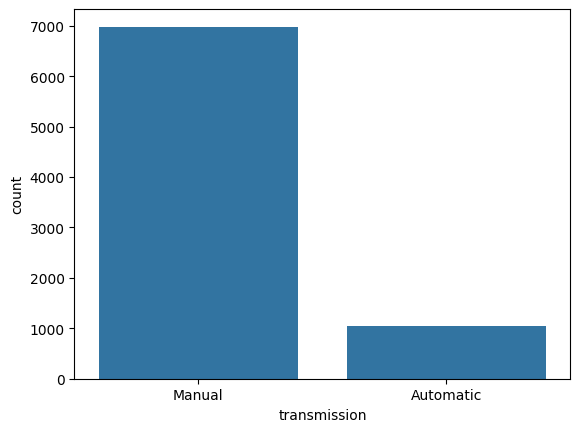

In [662]:
#counting the number of cars based on transmission type
sns.countplot(data = df, x = 'transmission')

<Axes: xlabel='seats', ylabel='count'>

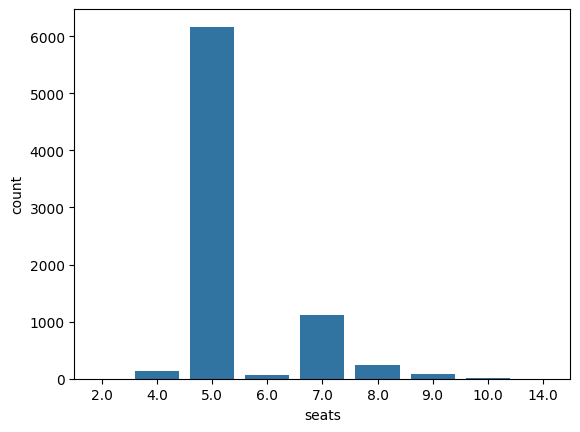

In [663]:
#counting the number of cars based on the number of seats
sns.countplot(data = df, x = 'seats')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31],
 [Text(0, 0, 'Maruti'),
  Text(1, 0, 'Skoda'),
  Text(2, 0, 'Honda'),
  Text(3, 0, 'Hyundai'),
  Text(4, 0, 'Toyota'),
  Text(5, 0, 'Ford'),
  Text(6, 0, 'Renault'),
  Text(7, 0, 'Mahindra'),
  Text(8, 0, 'Tata'),
  Text(9, 0, 'Chevrolet'),
  Text(10, 0, 'Fiat'),
  Text(11, 0, 'Datsun'),
  Text(12, 0, 'Jeep'),
  Text(13, 0, 'Mercedes-Benz'),
  Text(14, 0, 'Mitsubishi'),
  Text(15, 0, 'Audi'),
  Text(16, 0, 'Volkswagen'),
  Text(17, 0, 'BMW'),
  Text(18, 0, 'Nissan'),
  Text(19, 0, 'Lexus'),
  Text(20, 0, 'Jaguar'),
  Text(21, 0, 'Land'),
  Text(22, 0, 'MG'),
  Text(23, 0, 'Volvo'),
  Text(24, 0, 'Daewoo'),
  Text(25, 0, 'Kia'),
  Text(26, 0, 'Force'),
  Text(27, 0, 'Ambassador'),
  Text(28, 0, 'Ashok'),
  Text(29, 0, 'Isuzu'),
  Text(30, 0, 'Opel'),
  Text(31, 0, 'Peugeot')])

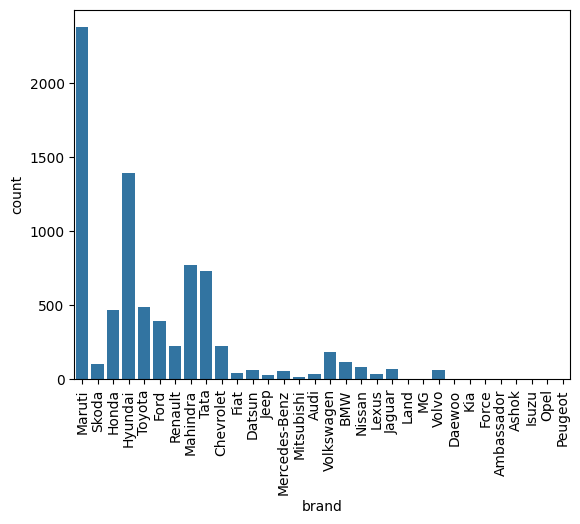

In [664]:
#counting the number of cars based on brand
sns.countplot(data = df, x = 'brand')
plt.xticks(rotation = 90)


Distribution Plot (For all features that are continuous)

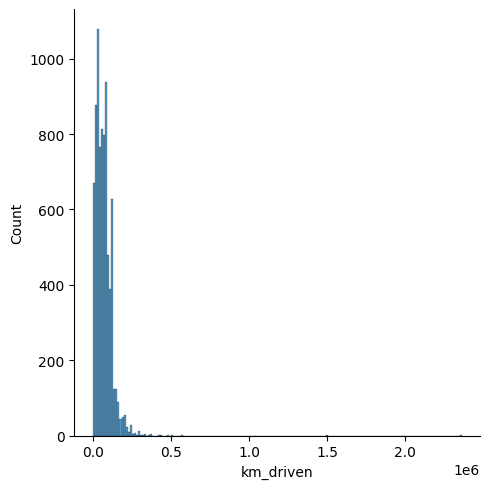

In [665]:
#km_driven is right skewed so we will apply log transformation 
sns.displot(data = df, x = 'km_driven')

In [666]:
#applying log transformation to km_driven
df['km_driven'] = np.log1p(df['km_driven']) 

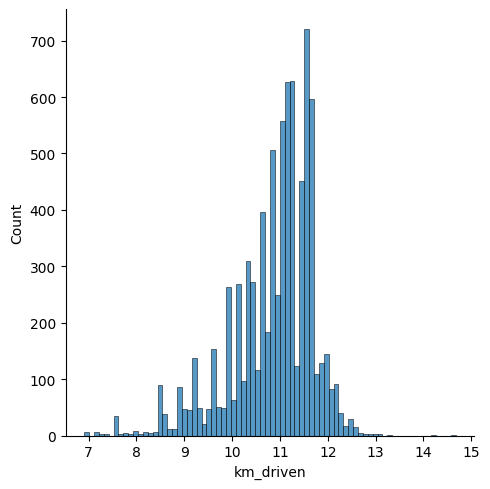

In [667]:
#counting the number of cars based on km driven after log transformation
sns.displot(data = df, x = 'km_driven')

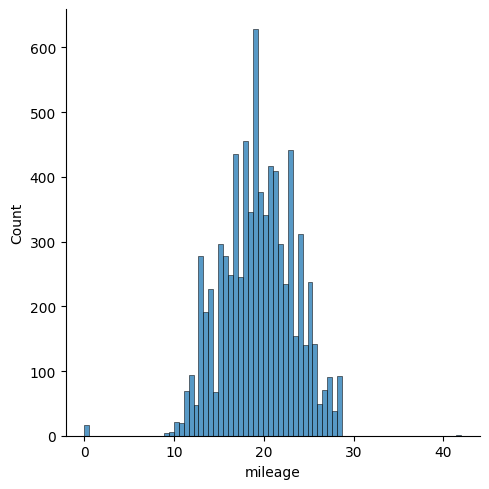

In [668]:
#counting the number of cars based on mileage
sns.displot(data = df, x = 'mileage')

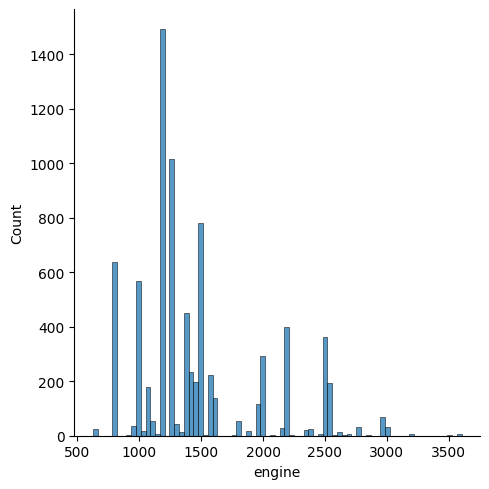

In [669]:
#counting the number of cars based on engine power
sns.displot(data = df, x = 'engine')

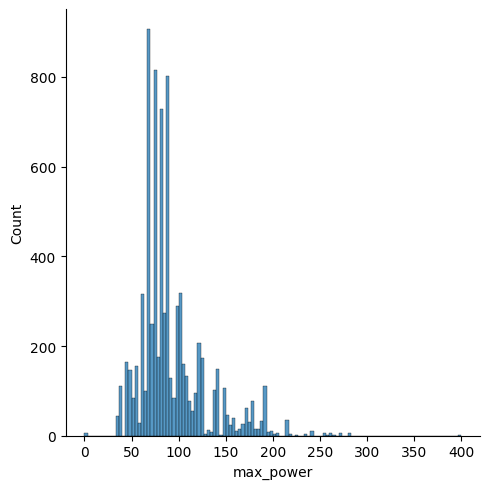

In [670]:
#counting the number of cars based on max engine power
sns.displot(data = df, x = 'max_power')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27],
 [Text(0, 0, '1983'),
  Text(1, 0, '1994'),
  Text(2, 0, '1995'),
  Text(3, 0, '1996'),
  Text(4, 0, '1997'),
  Text(5, 0, '1998'),
  Text(6, 0, '1999'),
  Text(7, 0, '2000'),
  Text(8, 0, '2001'),
  Text(9, 0, '2002'),
  Text(10, 0, '2003'),
  Text(11, 0, '2004'),
  Text(12, 0, '2005'),
  Text(13, 0, '2006'),
  Text(14, 0, '2007'),
  Text(15, 0, '2008'),
  Text(16, 0, '2009'),
  Text(17, 0, '2010'),
  Text(18, 0, '2011'),
  Text(19, 0, '2012'),
  Text(20, 0, '2013'),
  Text(21, 0, '2014'),
  Text(22, 0, '2015'),
  Text(23, 0, '2016'),
  Text(24, 0, '2017'),
  Text(25, 0, '2018'),
  Text(26, 0, '2019'),
  Text(27, 0, '2020')])

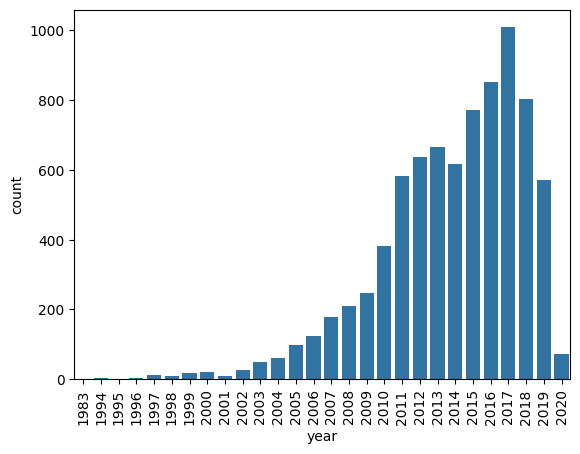

In [671]:
#counting the number of cars based on year
sns.countplot(data = df, x = 'year')
plt.xticks(rotation = 90)


Multivariate Analysis

Boxplot (For features that are discrete and y or selling price is continuous)

Text(0.5, 0, 'Fuel')

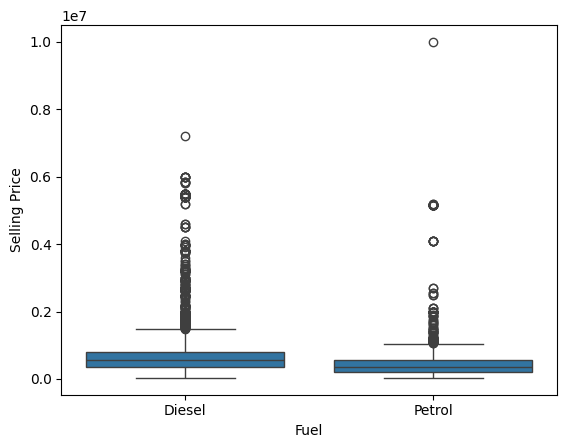

In [672]:
sns.boxplot(x = df["fuel"], y = df["selling_price"])
plt.ylabel("Selling Price")
plt.xlabel("Fuel")

Text(0.5, 0, 'Transmission')

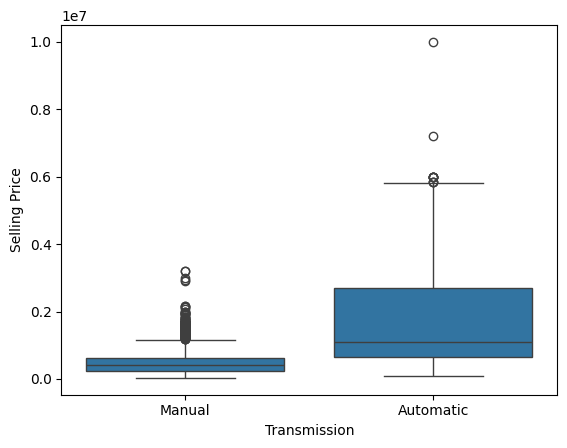

In [673]:
#checking the data distribution of selling price based on transmission type
sns.boxplot(x = df["transmission"], y = df["selling_price"])
plt.ylabel("Selling Price")
plt.xlabel("Transmission")

Text(0.5, 0, 'Owner')

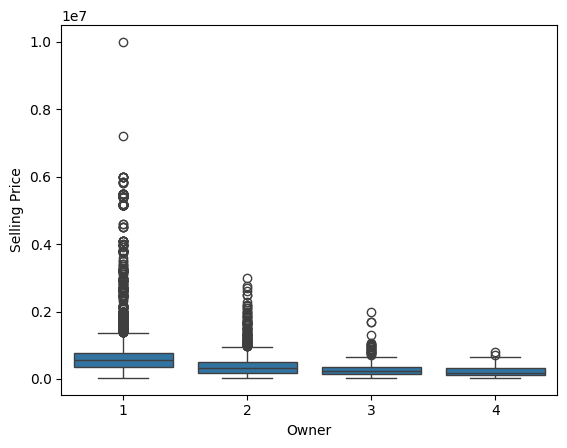

In [674]:
#checking the data distribution of selling price based on owner
sns.boxplot(x = df["owner"], y = df["selling_price"])
plt.ylabel("Selling Price")
plt.xlabel("Owner")

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31],
 [Text(0, 0, 'Maruti'),
  Text(1, 0, 'Skoda'),
  Text(2, 0, 'Honda'),
  Text(3, 0, 'Hyundai'),
  Text(4, 0, 'Toyota'),
  Text(5, 0, 'Ford'),
  Text(6, 0, 'Renault'),
  Text(7, 0, 'Mahindra'),
  Text(8, 0, 'Tata'),
  Text(9, 0, 'Chevrolet'),
  Text(10, 0, 'Fiat'),
  Text(11, 0, 'Datsun'),
  Text(12, 0, 'Jeep'),
  Text(13, 0, 'Mercedes-Benz'),
  Text(14, 0, 'Mitsubishi'),
  Text(15, 0, 'Audi'),
  Text(16, 0, 'Volkswagen'),
  Text(17, 0, 'BMW'),
  Text(18, 0, 'Nissan'),
  Text(19, 0, 'Lexus'),
  Text(20, 0, 'Jaguar'),
  Text(21, 0, 'Land'),
  Text(22, 0, 'MG'),
  Text(23, 0, 'Volvo'),
  Text(24, 0, 'Daewoo'),
  Text(25, 0, 'Kia'),
  Text(26, 0, 'Force'),
  Text(27, 0, 'Ambassador'),
  Text(28, 0, 'Ashok'),
  Text(29, 0, 'Isuzu'),
  Text(30, 0, 'Opel'),
  Text(31, 0, 'Peugeot')])

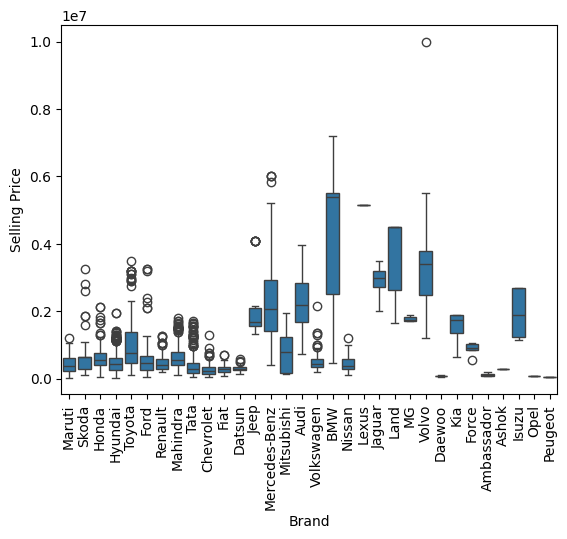

In [675]:
#checking the data distribution of selling price based on the car brand
sns.boxplot(x = df["brand"], y = df["selling_price"])
plt.ylabel("Selling Price")
plt.xlabel("Brand")
plt.xticks(rotation = 90)


Text(0.5, 0, 'Seller Type')

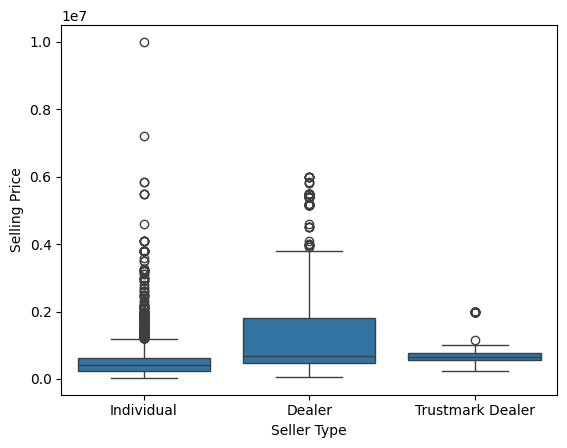

In [676]:
#checking the data distribution of selling price based on the type of seller
sns.boxplot(x = df["seller_type"], y = df["selling_price"])
plt.ylabel("Selling Price")
plt.xlabel("Seller Type")

Text(0.5, 0, 'Seats')

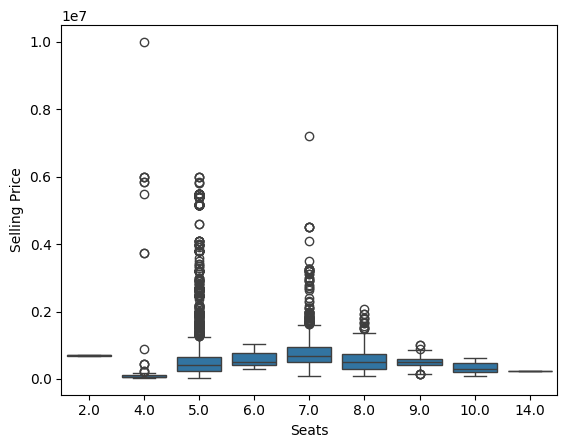

In [677]:
#checking the data distribution of selling price based on the number of seats
sns.boxplot(x = df["seats"], y = df["selling_price"])
plt.ylabel("Selling Price")
plt.xlabel("Seats")

Scatterplot (For when the features are continuous)

<Axes: xlabel='km_driven', ylabel='selling_price'>

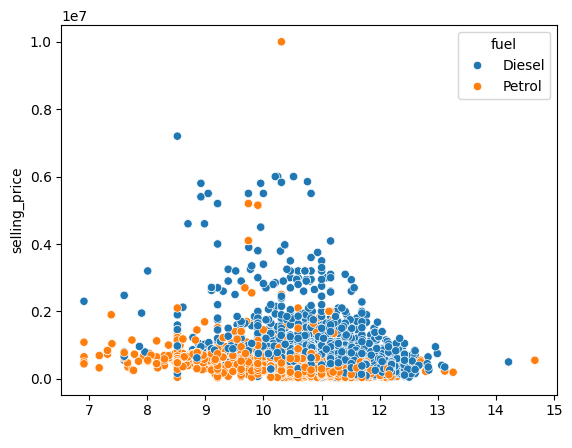

In [678]:
sns.scatterplot(x = df["km_driven"], y = df["selling_price"], hue=df['fuel'])

<Axes: xlabel='mileage', ylabel='selling_price'>

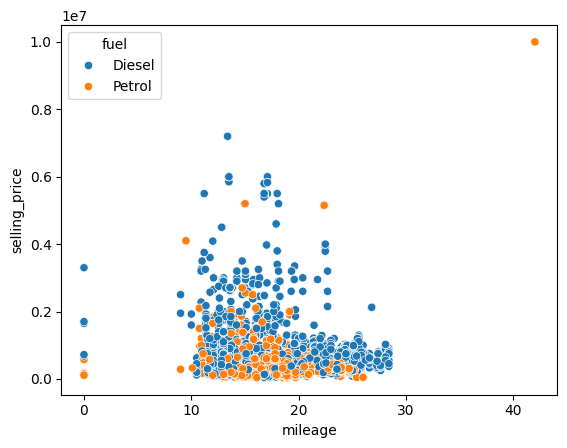

In [679]:
sns.scatterplot(x = df["mileage"], y = df["selling_price"], hue=df['fuel'])

<Axes: xlabel='engine', ylabel='selling_price'>

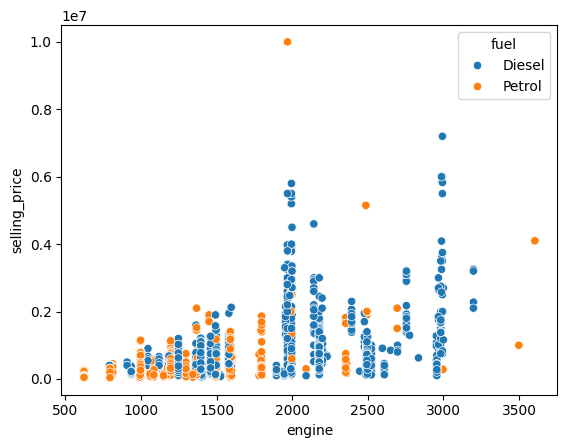

In [680]:
sns.scatterplot(x = df["engine"], y = df["selling_price"], hue=df['fuel'])

<Axes: xlabel='max_power', ylabel='selling_price'>

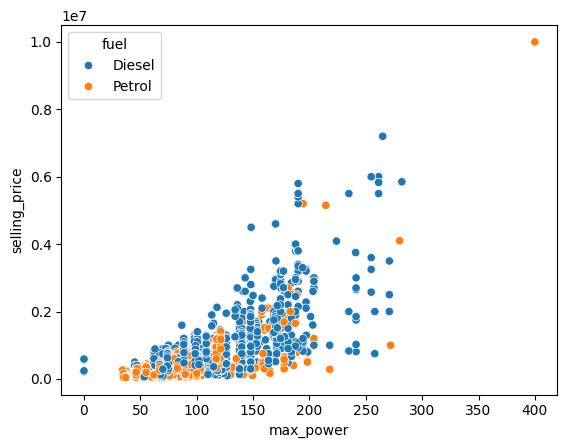

In [681]:
sns.scatterplot(x = df["max_power"], y = df["selling_price"], hue=df['fuel'])

<Axes: xlabel='year', ylabel='selling_price'>

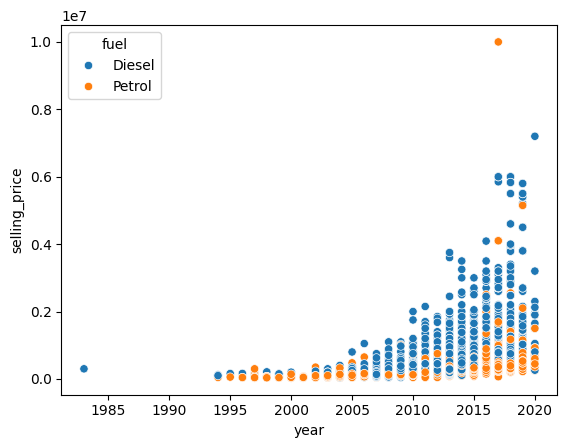

In [682]:
sns.scatterplot(x = df["year"], y = df["selling_price"], hue=df['fuel'])

Correlation Matrix

Using correlation matrix to visualise data that strongly affect the selling price and also to identify the features that are highly correlated.

<Axes: >

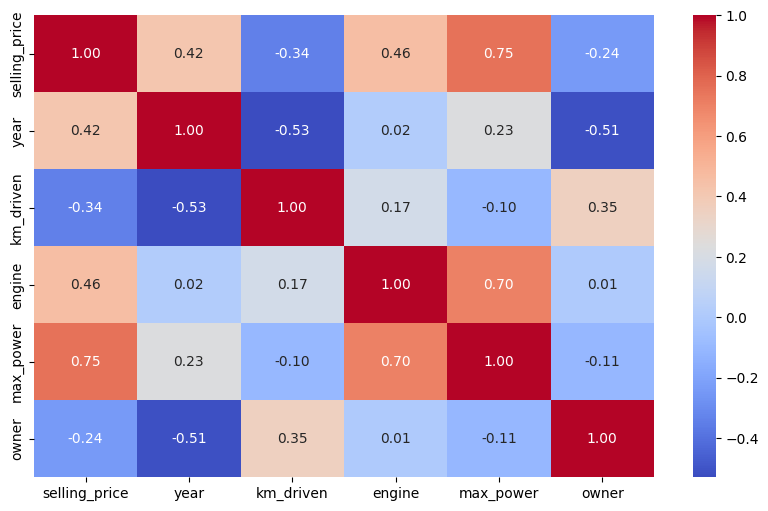

In [683]:
num_cols = ['selling_price', 'year', 'km_driven', 'engine', 'max_power', 'owner']
corr = df[num_cols].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")


FEATURE ENGINEERING 

-Not required as the data clean up has been done in TASK 1

FEATURE SELECTION

In [684]:
#Best features for predicting selling price based on EDA and correlation analysis
X = df[['engine', 'brand', 'owner', 'transmission', 'year']]
y = np.log(df['selling_price']) #using the log-transformed y

SPLITTING TRAIN AND TEST DATA

In [685]:
from sklearn.model_selection import train_test_split

#splitting the dataset into training and testing sets
#20% of the data has been set aside for testing with random seeding starting at 40 for consistent results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

PREPROCESSING

Checking for null values

In [686]:
#Checking for null values in the segregated train set
X_train[['engine', 'brand', 'owner', 'transmission', 'year']].isna().sum()

engine          170
brand             0
owner             0
transmission      0
year              0
dtype: int64

In [687]:
#Checking for null values in the remaining test set
X_test[['engine', 'brand', 'owner', 'transmission', 'year']].isna().sum()

engine          44
brand            0
owner            0
transmission     0
year             0
dtype: int64

In [688]:
y_train.isna().sum()  #Checking for null values in the target variable of the training set

np.int64(0)

In [689]:
y_test.isna().sum()   #Checking for null values in the target variable of the testing set

np.int64(0)

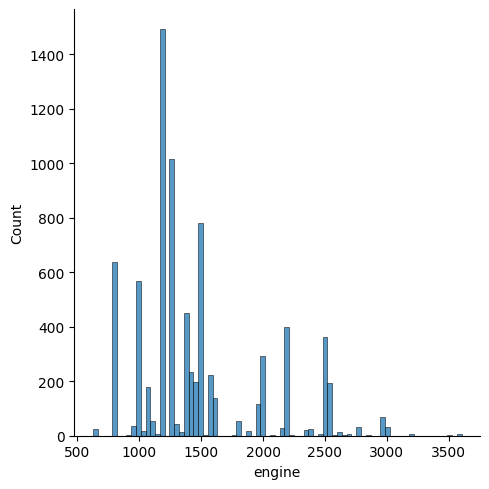

In [690]:
#re-checking engine distribution before filling null values in the data set
sns.displot(data = df, x = 'engine')

In [691]:
#filling the training set with median
X_train['engine'].fillna(X_train['engine'].median(), inplace=True)

/var/folders/28/vn55ny5s5114jn9bjs666k2w0000gn/T/ipykernel_71201/612629780.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['engine'].fillna(X_train['engine'].median(), inplace=True)


In [692]:
#filling the test set with median
X_test['engine'].fillna(X_train['engine'].median(), inplace=True)

/var/folders/28/vn55ny5s5114jn9bjs666k2w0000gn/T/ipykernel_71201/721314192.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test['engine'].fillna(X_train['engine'].median(), inplace=True)


In [693]:
#checking if the null values have been filled
X_test.isnull().sum()
X_train.isnull().sum()


engine          0
brand           0
owner           0
transmission    0
year            0
dtype: int64

Checking Outliers

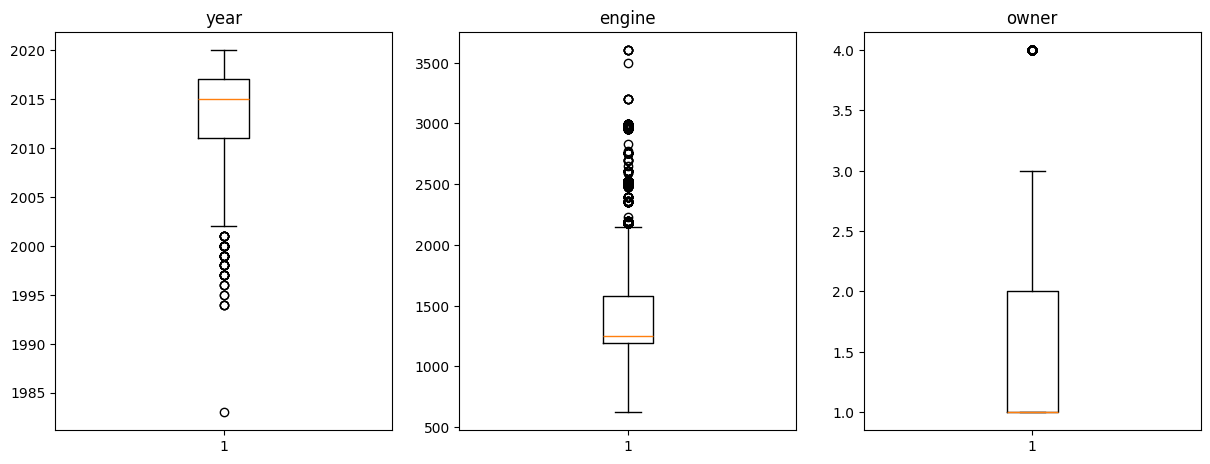

In [694]:
col_dict = {
    'year' : 1,
    'engine': 2,
    'owner': 3
}
plt.figure(figsize=(20,30))

for variable, i in col_dict.items():
    plt.subplot(5, 4, i)
    plt.boxplot(X_train[variable])
    plt.title(variable)

plt.show()

Scaling

In [695]:
from sklearn.preprocessing import StandardScaler

#seperating numerical and categorical features for scaling
num_cols = ['engine', 'owner', 'year']
cat_cols = ['brand', 'transmission']


X_train = pd.get_dummies(X_train, columns=cat_cols, drop_first=True)
X_test  = pd.get_dummies(X_test, columns=cat_cols, drop_first=True)

# Align columns in case test has extra/missing dummy columns
X_test = X_test.reindex(columns = X_train.columns, fill_value=0)


In [696]:
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols]) #scaling only the numerical features
X_test[num_cols]  = scaler.transform(X_test[num_cols])

In [697]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (6422, 34)
Shape of X_test:  (1606, 34)
Shape of y_train:  (6422,)
Shape of y_test:  (1606,)


Model Selection

In [698]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#evaluating baseline MSE and r2 using Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

print("MSE: ", mean_squared_error(y_test, yhat))
print("r2: ", r2_score(y_test, yhat))

MSE:  0.08957842279335618
r2:  0.8758243372423382


Comparing Algorithms

In [699]:
#comparing algorithms to identify the best one
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

algorithms = [LinearRegression(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(random_state = 0), 
              RandomForestRegressor(n_estimators = 100, random_state = 0)]

algorithm_names = ["Linear Regression", "SVR", "KNeighbors Regressor", "Decision-Tree Regressor", "Random-Forest Regressor"]


In [700]:
from sklearn.model_selection import KFold, cross_val_score

train_mse = []
test_mse = []

kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()}")

Linear Regression - Score: [-0.09982402 -0.09802496 -0.10262679 -0.0866325  -0.093894  ]; Mean: -0.09620045172387723
SVR - Score: [-0.0648526  -0.06046662 -0.0614228  -0.05483273 -0.06235489]; Mean: -0.060785927245627036
KNeighbors Regressor - Score: [-0.0708466  -0.06842624 -0.0668979  -0.05794038 -0.06999552]; Mean: -0.06682132913458091
Decision-Tree Regressor - Score: [-0.07103614 -0.06813564 -0.08302906 -0.06354082 -0.07383873]; Mean: -0.07191608020641448
Random-Forest Regressor - Score: [-0.05996385 -0.05969832 -0.06000969 -0.05156277 -0.06278389]; Mean: -0.05880370465685499


Grid Search

According to the cross validation conducted above, it shows that Random Forest Regressor is the most efficient model for this.

Now we use grid search to find the best version of the model.

In [701]:
#using random forest regressor to evaluate MSE and r2 after cross validation
from sklearn.metrics import mean_squared_error, r2_score

lr = RandomForestRegressor()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

print("MSE: ", mean_squared_error(y_test, yhat))
print("r2: ", r2_score(y_test, yhat))

MSE:  0.0596242375888362
r2:  0.9173475153040632


In [702]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=32)

param_grid = {
    'bootstrap': [True],
    'max_depth': [None, 10, 20, 30],
    'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]
}

grid = GridSearchCV(estimator=rf, 
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           n_jobs=1)

grid.fit(X_train, y_train)

,estimator,RandomForestR...ndom_state=32)
,param_grid,"{'bootstrap': [True], 'max_depth': [None, 10, ...], 'n_estimators': [5, 6, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,15


In [703]:
grid.best_params_

{'bootstrap': True, 'max_depth': None, 'n_estimators': 15}

In [704]:
best_mse = grid.best_score_
best_mse

np.float64(-0.06025215780077818)

Testing

In [705]:
yhat = grid.predict(X_test)

print("MSE: ",mean_squared_error(y_test, yhat))
print("R2: ", r2_score(y_test, yhat))

MSE:  0.06126888078928959
R2:  0.9150676732053996


In [706]:
# Convert log-transformed selling price back to original price scale
result_df = pd.DataFrame({
    'Actual Price': np.exp(y_test),
    'Predicted Price': np.exp(yhat)
})

result_df.head()


,Actual Price,Predicted Price
5493,470000.0,571972.795636
6344,300000.0,254007.177483
7787,400000.0,469354.356484
457,375000.0,593978.902639
3596,420000.0,502638.079678


Inference

In [707]:
import pickle
import pandas as pd
import numpy as np

# Example new data
new_data = pd.DataFrame({
    'engine': [1500],
    'owner': [1],
    'year': [2019],
    'brand': ['Maruti'],
    'transmission': ['Manual'],
})

# Save trained model and scaler
with open("app/regression_model.pkl", "wb") as f:
    pickle.dump(grid, f)

with open("app/scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)
    
# Store the column order from the training set
with open("app/train_columns.pkl", "wb") as f:
    pickle.dump(X_train.columns, f)

# Load for inference
with open("app/regression_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

with open("app/scaler.pkl", "rb") as f:
    loaded_scaler = pickle.load(f)
    
with open("app/train_columns.pkl", "rb") as f:
    train_columns = pickle.load(f)

# Preprocess
num_cols = ['engine', 'owner', 'year']
cat_cols = ['brand', 'transmission']


# Scale numeric columns
new_data[num_cols] = loaded_scaler.transform(new_data[num_cols])

# One-hot encode categorical columns WITHOUT drop_first
new_data = pd.get_dummies(new_data, columns=cat_cols)

# Align columns with training set
new_data = new_data.reindex(columns=train_columns, fill_value=0)

# Predict
y_pred_log = loaded_model.predict(new_data)
y_pred = np.exp(y_pred_log)

print("Predicted value:", y_pred)

Predicted value: [932512.64201816]


TASK 2

Result Analysis

The project aims to develop a model that accurately predicts the selling price of used cars. Initial Exploratory Data Analysis (EDA) and the correlation matrix were used to identify the most influential features. The analysis showed that year, engine, and max_power have a strong relationship with selling price, which is intuitive since newer cars generally have more powerful engines. However, due to the high correlation between engine and max_power, max_power was dropped to avoid redundancy. The brand of the car was also evaluated as an important predictor, with boxplots showing significant price differences across manufacturers. Features like owner and transmission also impact price, with cars having more previous owners generally being cheaper, and automatic cars tending to be more expensive than manual ones. The torque feature was dropped in the beginning as it was not deemed useful for predicting price for this company. While other features like km_driven and mileage do influence price, the model only focused on the most powerful predictors for optimal performance and hence these features were dropped during feature selection.

After selecting the features, cross-validation was used to compare several models. The Random Forest Regressor outperformed Linear Regression, SVR, and a single Decision Tree, achieving the lowest Mean Squared Error. Its strong performance comes from its ability to capture complex, non-linear relationships between features and price, while Linear Regression performed the worst as it assumes a linear relationship between the features and price.
Random Forest looks at different features and their interactions to capture complex relationships, like how engine size, year, and brand together affect car price. Linear Regression assumes a straight-line or linear relationship between features and price, so it cannot capture connections between features, so it performs worse for predicting car prices.

The final Random Forest model was further tuned using GridSearchCV to find the best parameters. On the test data, the model achieved an r-squared score of approximately 0.92, indicating it is a reliable predictor of used car prices.

Link to GitHub:

https://github.com/prabidhipy/ml-car-prediction-A1.git